<h2><u>Alternative Idea of PAM(Partioning Around Medoids) : </u></h2>
<h3>This would need computation of mean which is O(n) where n is the number of points in the cluster followed by finding the closest point to this mean which is again O(n) making the overall complexity of this approach O(n). </h3>

# Step -1 : Pick K=3 points as medoids. Select 1st medoid randomly and other 2 medoids using Probabilistic Proportion approach.

In [69]:
import random 

#Original Data Points
data_points = []

for i in range(0,200000):
    d = round(random.random(),3)
    data_points.append(d)    
#print(data_points)

#Selecting k(three) random medoids
list1 = data_points

#Select first medoid m1
m1 = random.choice(list1)
list1.remove(m1)

In [70]:
#Select second medoid m2 
list2 = []
sumOfAll = sum(list1) 
dict1 = {}

for item in list1:        
        distance = (item - m1)**2
        distance = round(distance/sumOfAll,5)
        list2.append(distance)
        
for i in range(0,len(list2)):
    dict1[i] = list2[i]

list2.sort()

for x,y in dict1.items():
    if list2[-1] == y:
        m2 = list1[x]

#print(list1,list2,dict1,c2,c1,sep='\n')
list1.remove(m2)  

In [71]:
#Select third medoid m3
sumOfAll = sum(list1) 
list3 = []
dict2 = {}
for item in list1:
        distance1 = (item - m1)**2               
        distance2 = (item - m2)**2
        
        if distance1>distance2:
            distance1 = round(distance1/sumOfAll,5)
            list3.append(distance1)
        else:
            distance2 = round(distance2/sumOfAll,5)
            list3.append(distance2)

for i in range(0,len(list3)):
    dict2[i] = list3[i]

list3.sort()

for x,y in dict2.items():
    if list3[-1] == y:
        m3 = list1[x]

print(m1,m2,m3,sep='\n')
list1.remove(m3)

0.954
0.091
0.844


# Step-2 : For each x data point, calculate the distance from each medoid and assign it to nearest medoid.

In [72]:
#defining sets/clusters based on the nearest medoids 

def nearest_medoid(list1,m1,m2,m3):
    set1 = []
    set2 = []
    set3 = []
    for item in list1:
        dist1 = (m1 - item)**2 #using squares of data to get modules
        dist2 = (m2 - item)**2 #using squares of data to get modules
        dist3 = (m3 - item)**2 #using squares of data to get modules       
              
        if dist1<dist2 and dist1<dist3:
            set1.append(item)
        elif dist2<dist1 and dist2<dist3:
            set2.append(item)
        else:
            set3.append(item) 
        
    return set1,set2,set3

# Step-3 : Find each medoid for each cluster by taking their sample average value

In [73]:
#to create new medoids from the clusters using average values of points inside the clusters
def new_medoid(cluster):
    small_than_mean = []
    if len(cluster) == 0:
        length = 1
    else:
        length = len(cluster) 
    
    sum_ele = sum(cluster)
    
    new_mean = sum_ele/length   
    
    for i in cluster:
        if new_mean > i:
            small_than_mean.append(i)
            
    small_than_mean.sort()
    new_m = small_than_mean[-1]
    return new_m

# Step-4 : Compare new medoid with old medoid, if distance is negligible break the loop or reperform step2.

In [74]:
#to compare different medoids values
def compare_newM_with_OldM(m1,m2,m3,set1,set2,set3):

    old_m1 = m1
    new_m1 = new_medoid(set1) 

    old_m2 = m2
    new_m2 = new_medoid(set2) 

    old_m3 = m3
    new_m3 = new_medoid(set3)     

    if old_m1<=new_m1:
        new_m1 = old_m1

    if old_m2<=new_m2:
        new_m2 = old_m2

    if old_m3<=new_m3:
        new_m3 = old_m3

    return new_m1,new_m2,new_m3

print('old_m1 = {} old_m2 = {} old_m3 ={}'.format(m1,m2,m3))

while 1:
    #print('old_m1 = {} old_m2 = {} old_m3 ={}'.format(m1,m2,m3))
    tuple0 = nearest_medoid(list1,m1,m2,m3)
    set1 = tuple0[0]
    set2 = tuple0[1]
    set3 = tuple0[2]
    
    tuple1 = compare_newM_with_OldM(m1,m2,m3,set1,set2,set3)
    new_m1 = round(tuple1[0],4)
    new_m2 = round(tuple1[1],4)
    new_m3 = round(tuple1[2],4)
    
    if m1==new_m1 and m2==new_m2 and m3==new_m3:
        break
    else:
        m1 = new_m1
        m2 = new_m2
        m3 = new_m3  
    print('new_m1 = {} new_m2 = {} new_m3 ={}'.format(new_m1,new_m2,new_m3))
        
print('new_m1 = {} new_m2 = {} new_m3 ={}'.format(new_m1,new_m2,new_m3))

old_m1 = 0.954 old_m2 = 0.091 old_m3 =0.844
new_m1 = 0.949 new_m2 = 0.091 new_m3 =0.682
new_m1 = 0.907 new_m2 = 0.091 new_m3 =0.6
new_m1 = 0.876 new_m2 = 0.091 new_m3 =0.549
new_m1 = 0.855 new_m2 = 0.091 new_m3 =0.516
new_m1 = 0.842 new_m2 = 0.091 new_m3 =0.494
new_m1 = 0.833 new_m2 = 0.091 new_m3 =0.48
new_m1 = 0.828 new_m2 = 0.091 new_m3 =0.471
new_m1 = 0.824 new_m2 = 0.091 new_m3 =0.465
new_m1 = 0.822 new_m2 = 0.091 new_m3 =0.461
new_m1 = 0.82 new_m2 = 0.091 new_m3 =0.458
new_m1 = 0.819 new_m2 = 0.091 new_m3 =0.456
new_m1 = 0.818 new_m2 = 0.091 new_m3 =0.455
new_m1 = 0.818 new_m2 = 0.091 new_m3 =0.454
new_m1 = 0.817 new_m2 = 0.091 new_m3 =0.454
new_m1 = 0.817 new_m2 = 0.091 new_m3 =0.454


In [75]:
print(len(set1),len(set2),len(set3),sep='\n')

72923
54298
72776


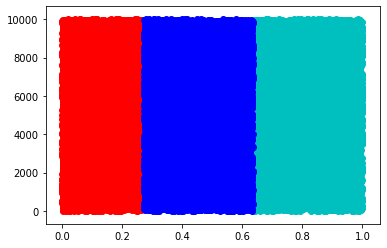

In [76]:
import matplotlib.pyplot as plt
y = []
for i in range(0,10000):
    y.append(i)

y.sort()

plt.scatter(set1[0:10000],y,color = 'c' )
plt.scatter(set2[0:10000],y,color = 'r' )
plt.scatter(set3[0:10000],y,color = 'b' )
plt.show()